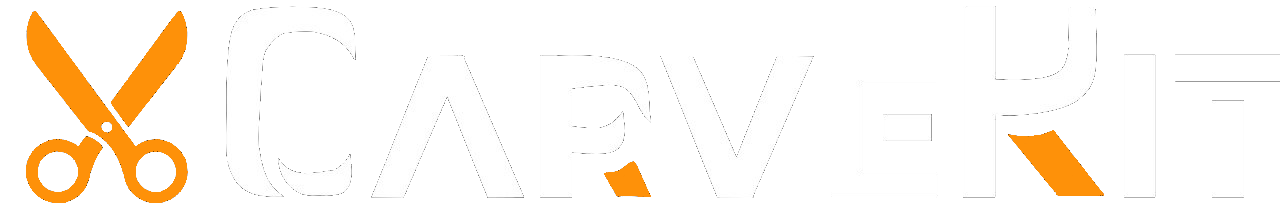

### Automated high-quality background removal framework for an image using neural networks



- 🏢 [Project at GitHub](https://github.com/OPHoperHPO/freezed_carvekit_2023) 🏢
- 🔗 [Author at GitHub](https://github.com/OPHoperHPO) 🔗

> Please rate our repository with ⭐ if you like our work! Thanks! 😀

This notebook supports **Google Colab GPU runtime**.

> **Enabling and testing the GPU** \
> Navigate to `Edit → Notebook Settings`. \
> Select `GPU` from the `Hardware Accelerator` drop-down.

# Install CarveKit

In [1]:
#@title Install colab-ready python package (Click the arrow on the left)
%cd /content
!git clone https://github.com/OPHoperHPO/freezed_carvekit_2023 --depth 1
%cd freezed_carvekit_2023

/content
Cloning into 'freezed_carvekit_2023'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 214 (delta 12), reused 107 (delta 2), pack-reused 0
Receiving objects: 100% (214/214), 10.56 MiB | 21.07 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/freezed_carvekit_2023


In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  import re
  with open("requirements.txt", "r") as f:
    reqs = f.read()
  with open("requirements.txt", "w") as f:
    reqs = re.sub(r'[=|~]=[^\n]*', '', reqs)
    f.write(reqs)
  !pip3 install -r requirements.txt
else:
  print("Please, check your environment to be compitable with this software! This notebook was tested only on Google Colab at 11.09.2023!")
  !pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 4.4 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26305 sha256=a66bdd85fa77e3cfdad190aa7e6305dfaf617365d942e8714ce0c5a9bab27c4c
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [3]:
#@title Download all models
from carvekit.ml.files.models_loc import download_all

download_all();

# Remove background using CarveKit

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


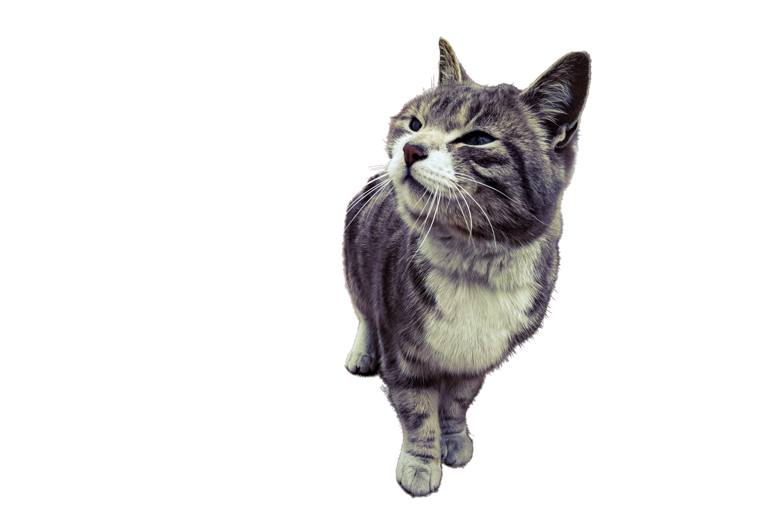

In [4]:
#@title Upload images from your computer
#@markdown Description of parameters
#@markdown - `SHOW_FULLSIZE`  - Shows image in full size (may take a long time to load)
#@markdown - `PREPROCESSING_METHOD`  - Preprocessing method. `AutoScene` will automatically select needed model depends on your image. If you don't want, disable it.
#@markdown - `SEGMENTATION_NETWORK`  - Segmentation network. Use `isnet` for hairs-like objects and `tracer_b7` for objects
#@markdown - `POSTPROCESSING_METHOD`  - Postprocessing method
#@markdown - `SEGMENTATION_MASK_SIZE` - Segmentation mask size. Use 960 for Tracer B7 and 1024 for ISNet
#@markdown - `TRIMAP_DILATION`  - The size of the offset radius from the object mask in pixels when forming an unknown area
#@markdown - `TRIMAP_EROSION`  - The number of iterations of erosion that the object's mask will be subjected to before forming an unknown area
#@markdown > Look README.md and code for more details on networks and methods


import torch
from IPython import display
from google.colab import files
from carvekit.web.schemas.config import MLConfig
from carvekit.web.utils.init_utils import init_interface

SHOW_FULLSIZE = False #@param {type:"boolean"}
PREPROCESSING_METHOD = "none" #@param ["autoscene", "auto", "none"]
SEGMENTATION_NETWORK = "isnet" #@param ["u2net", "deeplabv3", "basnet", "tracer_b7", "isnet"]
POSTPROCESSING_METHOD = "fba" #@param ["fba", "cascade_fba", "none"]
SEGMENTATION_MASK_SIZE = 1024 #@param ["640", "320"] {type:"raw", allow-input: true}
TRIMAP_DILATION = 30 #@param {type:"integer"}
TRIMAP_EROSION = 1 #@param {type:"integer"}
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


config = MLConfig(segmentation_network=SEGMENTATION_NETWORK,
                  preprocessing_method=PREPROCESSING_METHOD,
                  postprocessing_method=POSTPROCESSING_METHOD,
                  seg_mask_size=SEGMENTATION_MASK_SIZE,
                  trimap_dilation=TRIMAP_DILATION,
                  trimap_erosion=TRIMAP_EROSION,
                  device=DEVICE)


interface = init_interface(config)




uploaded = files.upload().keys()
display.clear_output()
images = interface(uploaded)
for im in enumerate(images):
  if not SHOW_FULLSIZE:
    im[1].thumbnail((768, 768), resample=3)
  display.display(im[1])

